In [32]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [33]:
# read cycling data and review
data=pd.read_csv("zwift cycling data.csv")
data.head()

,Activity Type,Date,Title,Time,Moving Time,Elapsed Time,Distance,Calories,Avg HR,Max HR,...,Total Ascent,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Max Avg Power (20 min),Avg Power,Max Power,Number of Laps,Min Elevation,Max Elevation
0,Virtual Cycling,8/26/22 15:53,Zwift - 2x15 High Tempo in Makuri Islands,1:00:15,0:59:58,1:00:25,21.19,565,147,176,...,558.0,84,98,181,186,163,291,8,400,657.0
1,Virtual Cycling,8/25/22 21:11,Zwift - Makuri Islands,0:37:12,0:37:07,0:37:11,9.96,233,123,132,...,564.0,87,119,111,111,109,217,13,400,628.0
2,Virtual Cycling,8/24/22 21:09,Zwift - Watopia,0:53:43,0:53:41,0:53:42,17.44,465,141,172,...,361.0,86,98,181,187,151,245,12,-20,51.0
3,Virtual Cycling,8/23/22 20:46,Zwift - Endurance 1HR in Makuri Islands,1:10:25,1:10:20,1:10:24,23.80,612,140,155,...,817.0,83,112,156,173,151,181,15,400,628.0
4,Virtual Cycling,8/17/22 21:31,Zwift - Endurance 1HR in Makuri Islands,1:05:22,1:05:18,1:05:21,23.19,604,52,171,...,600.0,84,95,169,189,161,201,15,400,433.0


In [34]:
# drop columns that are not needed
data.drop(columns=['Activity Type', 'Title', 'Time'], axis=1, inplace=True)

In [35]:
# review after dropping columns
data.head()

,Date,Moving Time,Elapsed Time,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Total Ascent,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Max Avg Power (20 min),Avg Power,Max Power,Number of Laps,Min Elevation,Max Elevation
0,8/26/22 15:53,0:59:58,1:00:25,21.19,565,147,176,21.1,33.6,558.0,84,98,181,186,163,291,8,400,657.0
1,8/25/22 21:11,0:37:07,0:37:11,9.96,233,123,132,16.1,31.6,564.0,87,119,111,111,109,217,13,400,628.0
2,8/24/22 21:09,0:53:41,0:53:42,17.44,465,141,172,19.5,33.8,361.0,86,98,181,187,151,245,12,-20,51.0
3,8/23/22 20:46,1:10:20,1:10:24,23.80,612,140,155,20.3,35.1,817.0,83,112,156,173,151,181,15,400,628.0
4,8/17/22 21:31,1:05:18,1:05:21,23.19,604,52,171,21.3,28.2,600.0,84,95,169,189,161,201,15,400,433.0


In [36]:
for col in data.columns:
    print(col)

Date
Moving Time
Elapsed Time
Distance
Calories
Avg HR
Max HR
Avg Speed
Max Speed
Total Ascent
Avg Bike Cadence
Max Bike Cadence
Normalized Power® (NP®)
Max Avg Power (20 min)
Avg Power
Max Power
Number of Laps
Min Elevation
Max Elevation


In [37]:
# statistics of the data
data.describe()

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Total Ascent,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Max Avg Power (20 min),Avg Power,Max Power,Number of Laps,Min Elevation,Max Elevation
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,15.734787,385.627660,136.957447,165.978723,18.407447,32.104255,571.117021,83.223404,105.106383,148.117021,150.276596,126.755319,290.446809,5.914894,92.861702,282.595745
std,6.751906,188.706063,11.101598,7.311765,3.285132,7.734602,665.731288,4.977701,8.823805,36.397996,37.859220,31.458690,68.721914,6.325677,150.155446,444.570285
min,2.520000,31.000000,52.000000,132.000000,7.100000,18.400000,20.000000,58.000000,90.000000,51.000000,47.000000,47.000000,144.000000,1.000000,-21.000000,49.000000
25%,11.562500,254.250000,137.000000,166.000000,16.475000,27.300000,105.000000,82.000000,100.000000,134.500000,139.000000,117.000000,244.250000,1.000000,34.000000,58.000000
50%,15.740000,410.500000,137.000000,166.000000,18.450000,29.500000,194.000000,84.000000,103.000000,159.500000,165.000000,135.000000,295.500000,1.000000,41.000000,58.000000
75%,21.647500,544.000000,137.000000,166.000000,20.300000,37.775000,887.500000,85.000000,108.000000,174.750000,174.000000,150.500000,345.500000,12.750000,42.000000,432.000000
max,32.970000,781.000000,154.000000,182.000000,25.300000,51.300000,3484.000000,92.000000,139.000000,187.000000,200.000000,173.000000,442.000000,18.000000,599.000000,3436.000000


In [38]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# only need to scale following columns
cols_to_scale = ['Distance', 'Calories', 'Avg HR', 'Max HR', 'Avg Speed', 'Max Speed', 'Avg Bike Cadence',
'Max Bike Cadence',
'Normalized Power® (NP®)',
'Max Avg Power (20 min)',
'Avg Power',
'Max Power',
'Number of Laps',
'Min Elevation',
'Max Elevation']


data_scaled = scaler.fit_transform(data[cols_to_scale])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01
mean,-1.771632e-18,-1.352346e-16,-1.161896e-16,1.924648e-15,-1.024004e-15,3.661374e-16,-7.928055e-16,1.771632e-16,-1.429117e-16,-2.622016e-16,1.440928e-16,3.312953e-16,-7.795183e-17,4.163336e-17,7.381802e-17
std,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00,1.005362e+00
min,-1.967688e+00,-1.889336e+00,-7.693756e+00,-4.672048e+00,-3.460462e+00,-1.781312e+00,-5.094450e+00,-1.721183e+00,-2.682504e+00,-2.742538e+00,-2.548834e+00,-2.142432e+00,-7.811413e-01,-7.623581e-01,-5.282591e-01
25%,-6.212555e-01,-6.999357e-01,3.853622e-03,2.925515e-03,-5.913943e-01,-6.244685e-01,-2.470948e-01,-5.818084e-01,-3.761206e-01,-2.994531e-01,-3.117621e-01,-6.758327e-01,-7.811413e-01,-3.941070e-01,-5.079062e-01
50%,7.761833e-04,1.325114e-01,3.853622e-03,2.925515e-03,1.302272e-02,-3.385073e-01,1.568515e-01,-2.399959e-01,3.144133e-01,3.909840e-01,2.634849e-01,7.392528e-02,-7.811413e-01,-3.472387e-01,-5.079062e-01
75%,8.804057e-01,8.437542e-01,3.853622e-03,2.925515e-03,5.791855e-01,7.370969e-01,3.588246e-01,3.296914e-01,7.356390e-01,6.299815e-01,7.588364e-01,8.053964e-01,1.086327e+00,-3.405432e-01,3.378664e-01
max,2.566331e+00,2.106410e+00,1.543376e+00,2.202913e+00,2.109355e+00,2.495109e+00,1.772637e+00,3.861753e+00,1.074001e+00,1.320419e+00,1.477895e+00,2.217136e+00,1.920728e+00,3.388836e+00,7.131184e+00


In [39]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [40]:
# inertia on the fitted data
kmeans.inertia_

989.0061840603405

Text(0, 0.5, 'Inertia')

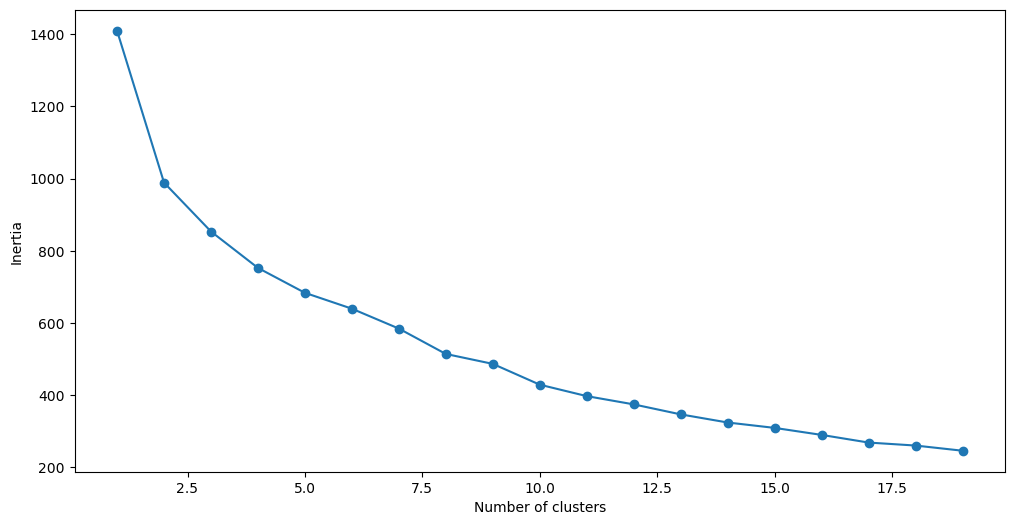

In [41]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [46]:
# Elbow method - optium cluster value is probably between 5-8
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 8, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [48]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    26
6    18
2    17
1    15
3    12
4     4
5     1
7     1
Name: cluster, dtype: int64